# LAB - 6

Build a classification model on heart disease UCI dataset using ensemble techniques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/heart.csv",)
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [ ]:
df = df.iloc[:,1:]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


In [ ]:
df.shape

(303, 15)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart Disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,1.531353
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,1.436806
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  target         303 non-null    int64  
 14  Heart Disease  303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [ ]:
df.corr()['target']

age             -0.225439
sex             -0.280937
cp               0.433798
trestbps        -0.144931
chol            -0.085239
fbs             -0.028046
restecg          0.137230
thalach          0.421741
exang           -0.436757
oldpeak         -0.430696
slope            0.345877
ca              -0.391724
thal            -0.344029
target           1.000000
Heart Disease    0.237127
Name: target, dtype: float64

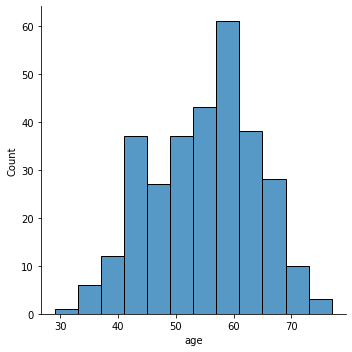

In [ ]:
sns.displot(data=df,x = 'age')

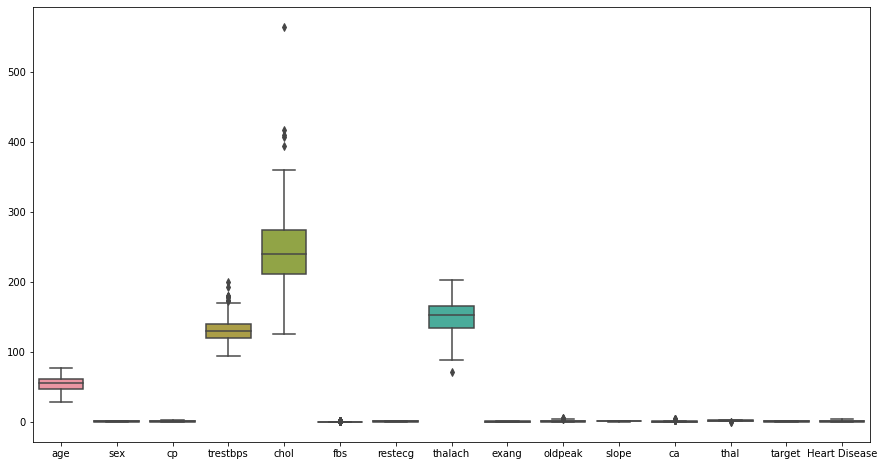

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(data=df)

In [ ]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [ ]:
df['Heart Disease'].value_counts()

1    105
0     83
4     62
2     48
3      5
Name: Heart Disease, dtype: int64

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

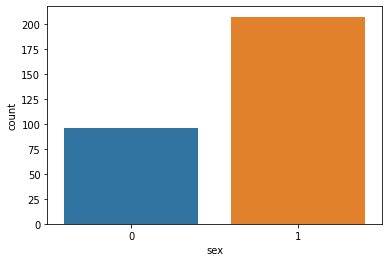

In [ ]:
sns.countplot(data=df,x='sex')

In [ ]:
female_disease = df.loc[(df['sex']==0) & (df.target==1)]
print('total no.of female heart disease patient: ' ,len(female_disease),' out of ',df.sex.value_counts()[0],' females')
male_disease = df.loc[(df['sex']==1) & (df.target==1)]
print('total no.of male heart disease patient: ' ,len(male_disease),' out of ',df.sex.value_counts()[1],' males')

total no.of female heart disease patient:  72  out of  96  females
total no.of male heart disease patient:  93  out of  207  males


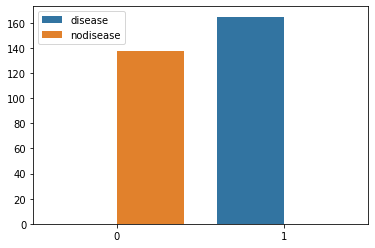

In [ ]:
sns.barplot(x = df.target.value_counts().index,y=df.target.value_counts().values,data=df,hue = ['disease','nodisease'])

There is a slight class imbalance, but not severe enough to require upsampling/downsampling methods.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# using ensemble techniques like decision tree and random forest, adaboost, xgboost
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
tree_acc_score=accuracy_score(y_test, y_pred_tree)
tree_f1_score=f1_score(y_test, y_pred_tree)
tree_conf_matrix=confusion_matrix(y_test,y_pred_tree)
# checking accuracy
print('Train Accuracy score: ',accuracy_score(y_train, tree.predict(X_train)))
print('Test Accuracy score: ', tree_acc_score)
print('Test F1 score: ', tree_f1_score)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_tree))

Train Accuracy score:  1.0
Test Accuracy score:  0.8524590163934426
Test F1 score:  0.847457627118644
confusion matrix
[[27  2]
 [ 7 25]]


              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
#INSTANTIATE RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_forest = rfc.predict(X_test)
rfc_acc_score=accuracy_score(y_test, y_pred_forest)
rfc_f1_score = f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Train Accuracy score: ',accuracy_score(y_train, rfc.predict(X_train)))
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Train Accuracy score:  1.0
Test Accuracy score:  0.8852459016393442
Test F1 score:  0.8923076923076922
confusion matrix
[[25  4]
 [ 3 29]]


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Instantiate the XGBClassifier: xg_cl
from xgboost import XGBClassifier
xg_cl = XGBClassifier(learning_rate=0.001, n_estimators=300, seed=2529)
# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)
# Predict the labels of the test set: preds
y_pred_xgb = xg_cl.predict(X_test)
xgb_acc_score=accuracy_score(y_test, y_pred_xgb)
xgb_f1_score = f1_score(y_test, y_pred_xgb)
xgb_conf_matrix=confusion_matrix(y_test,y_pred_xgb)
# Compute the accuracy: accuracy
# checking accuracy
print('Train Accuracy score: ',accuracy_score(y_train, xg_cl.predict(X_train)))
print('Test Accuracy score: ',xgb_acc_score)
print('Test F1 score: ', xgb_f1_score)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_xgb))

Train Accuracy score:  0.8760330578512396
Test Accuracy score:  0.819672131147541
Test F1 score:  0.8253968253968254
confusion matrix
[[24  5]
 [ 6 26]]


              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(learning_rate=0.05, n_estimators=100)
# Fit the classifier to the training set
abc.fit(X_train,y_train)
# Predict the labels of the test set: preds
y_pred_bc =  abc.predict(X_test)
abc_acc_score= accuracy_score(y_test, y_pred_abc)
abc_f1_score =  f1_score(y_test, y_pred_abc)
abc_conf_matrix=confusion_matrix(y_test,y_pred_abc)
# Compute the accuracy: accuracy
# checking accuracy
print('Train Accuracy score: ', accuracy_score(y_train,  abc.predict(X_train)))
print('Test Accuracy score: ', abc_acc_score)
print('Test F1 score: ',  abc_f1_score)
print("confusion matrix")
print( bc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_abc))

Train Accuracy score:  0.8677685950413223
Test Accuracy score:  0.8360655737704918
Test F1 score:  0.8387096774193549
confusion matrix
[[25  4]
 [ 6 26]]


              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(DecisionTreeClassifier())
# Fit the classifier to the training set
bc.fit(X_train,y_train)
# Predict the labels of the test set: preds
y_pred_bc =  bc.predict(X_test)
bc_acc_score= accuracy_score(y_test, y_pred_bc)
bc_f1_score =  f1_score(y_test, y_pred_bc)
bc_conf_matrix=confusion_matrix(y_test,y_pred_bc)
# Compute the accuracy: accuracy
# checking accuracy
print('Train Accuracy score: ', accuracy_score(y_train,  bc.predict(X_train)))
print('Test Accuracy score: ', bc_acc_score)
print('Test F1 score: ',  bc_f1_score)
print("confusion matrix")
print( bc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_bc))

Train Accuracy score:  0.9834710743801653
Test Accuracy score:  0.7868852459016393
Test F1 score:  0.7796610169491525
confusion matrix
[[25  4]
 [ 9 23]]


              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [ ]:
acc_scores = {'Decision tree':tree_acc_score,'Random forest':rfc_acc_score,'XGB':xgb_acc_score,'Adaboost': abc_acc_score, 'Bagging Classifier': bc_acc_score}
best_acc = max(zip(acc_scores.values(), acc_scores.keys()))
print(best_acc)

(0.8852459016393442, 'Random forest')
